In [1]:
from astropy.table import Table,QTable

import numpy as np

import matplotlib.pyplot as plt
%matplotlib notebook

# SGA

In [24]:
data_directory = '/Users/kellydouglass/Documents/Research/data/'

SGA_filename = data_directory + 'SGA/SGA-ellipse-v3.1.fits'

SGA_Christoph_filename = data_directory + 'SGA/SGA_BGS_inspecfootprint.fits'

In [25]:
SGA = QTable.read(SGA_filename, format='fits')

SGA_Christoph = Table.read(SGA_Christoph_filename, format='fits')

In [27]:
SGA

SGA_ID,GALAXY,PGC,SGA_RA,SGA_DEC,MORPHTYPE,PA_LEDA,D25_LEDA,BA_LEDA,Z_LEDA,SB_D25_LEDA,MAG_LEDA,BYHAND,REF,IN_FOOTPRINT,IN_FOOTPRINT_GRZ,GROUP_ID,GROUP_NAME,GROUP_MULT,GROUP_PRIMARY,GROUP_RA,GROUP_DEC,GROUP_DIAMETER,BRICKNAME,DIAM,DIAM_REF,PA,BA,ELLIPSEBIT,DROPBIT,RELEASE,BRICKID,OBJID,BRICK_PRIMARY,MASKBITS,ITERATIVE,TYPE,RA,DEC,RA_IVAR,DEC_IVAR,BX,BY,DCHISQ [5],EBV,MJD_MIN,MJD_MAX,REF_CAT,REF_ID,PMRA,PMDEC,PARALLAX,PMRA_IVAR,PMDEC_IVAR,PARALLAX_IVAR,REF_EPOCH,GAIA_POINTSOURCE,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_G_N_OBS,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_N_OBS,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_N_OBS,GAIA_PHOT_VARIABLE_FLAG,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_ASTROMETRIC_EXCESS_NOISE_SIG,GAIA_ASTROMETRIC_N_OBS_AL,GAIA_ASTROMETRIC_N_GOOD_OBS_AL,GAIA_ASTROMETRIC_WEIGHT_AL,GAIA_DUPLICATED_SOURCE,GAIA_A_G_VAL,GAIA_E_BP_MIN_RP_VAL,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,APFLUX_G [8],APFLUX_R [8],APFLUX_Z [8],APFLUX_RESID_G [8],APFLUX_RESID_R [8],APFLUX_RESID_Z [8],APFLUX_BLOBRESID_G [8],APFLUX_BLOBRESID_R [8],APFLUX_BLOBRESID_Z [8],APFLUX_IVAR_G [8],APFLUX_IVAR_R [8],APFLUX_IVAR_Z [8],APFLUX_MASKED_G [8],APFLUX_MASKED_R [8],APFLUX_MASKED_Z [8],APFLUX_W1 [5],APFLUX_W2 [5],APFLUX_W3 [5],APFLUX_W4 [5],APFLUX_RESID_W1 [5],APFLUX_RESID_W2 [5],APFLUX_RESID_W3 [5],APFLUX_RESID_W4 [5],APFLUX_IVAR_W1 [5],APFLUX_IVAR_W2 [5],APFLUX_IVAR_W3 [5],APFLUX_IVAR_W4 [5],MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,NOBS_G,NOBS_R,NOBS_Z,NOBS_W1,NOBS_W2,NOBS_W3,NOBS_W4,RCHISQ_G,RCHISQ_R,RCHISQ_Z,RCHISQ_W1,RCHISQ_W2,RCHISQ_W3,RCHISQ_W4,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACFLUX_W1,FRACFLUX_W2,FRACFLUX_W3,FRACFLUX_W4,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,ANYMASK_G,ANYMASK_R,ANYMASK_Z,ALLMASK_G,ALLMASK_R,ALLMASK_Z,WISEMASK_W1,WISEMASK_W2,PSFSIZE_G,PSFSIZE_R,PSFSIZE_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,PSFDEPTH_W1,PSFDEPTH_W2,PSFDEPTH_W3,PSFDEPTH_W4,WISE_COADD_ID,WISE_X,WISE_Y,SERSIC,SERSIC_IVAR,SHAPE_R,SHAPE_R_IVAR,SHAPE_E1,SHAPE_E1_IVAR,SHAPE_E2,SHAPE_E2_IVAR,RADIUS_SB22,RADIUS_SB22.5,RADIUS_SB23,RADIUS_SB23.5,RADIUS_SB24,RADIUS_SB24.5,RADIUS_SB25,RADIUS_SB25.5,RADIUS_SB26,G_MAG_SB22,R_MAG_SB22,Z_MAG_SB22,G_MAG_SB22.5,R_MAG_SB22.5,Z_MAG_SB22.5,G_MAG_SB23,R_MAG_SB23,Z_MAG_SB23,G_MAG_SB23.5,R_MAG_SB23.5,Z_MAG_SB23.5,G_MAG_SB24,R_MAG_SB24,Z_MAG_SB24,G_MAG_SB24.5,R_MAG_SB24.5,Z_MAG_SB24.5,G_MAG_SB25,R_MAG_SB25,Z_MAG_SB25,G_MAG_SB25.5,R_MAG_SB25.5,Z_MAG_SB25.5,G_MAG_SB26,R_MAG_SB26,Z_MAG_SB26,G_MAG_TOT,R_MAG_TOT,Z_MAG_TOT,PREBURNED,FREEZE
int64,bytes29,int64,float64,float64,bytes21,float32,float32,float32,float32,float32,float32,bool,bytes13,bool,bool,int64,bytes35,int16,bool,float64,float64,float32,bytes8,float32,bytes4,float32,float32,int32,int32,int16,int32,int32,bool,int16,bool,bytes6,float64,float64,float32,float32,float32,float32,float32,float32,float64,float64,bytes2,int64,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,int16,float32,float32,int16,float32,float32,int16,bool,float32,float32,int16,int16,float32,bool,float32,float32,float32,float32,uint8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,float32

In [4]:
SGA_Christoph

objID,BrickID,BrickName,ra,dec,gal_l,gal_b,z_photo,z_photo_median,z_photo_low95,z_spec,z_err,z_warn,mag_g,mag_r,mag_z,mag_W1,mag_B,photosys,fibre_mag_g,fibre_mag_r,fibre_mag_z,uncor_radius,BA_ratio,circ_radius,pos_angle,size_SGA,mag_g_err,mag_r_err,mag_z_err,circrad_err,rad_err,ratio_err,pos_angle_err,MORPHTYPE,FRACDEV,SHAPEDEV_R,SHAPEDEV_E1,SHAPEDEV_E2,SHAPEEXP_R,SHAPEEXP_E1,SHAPEEXP_E2,SHAPEDEV_R_IVAR,SHAPEDEV_E1_IVAR,SHAPEDEV_E2_IVAR,SHAPEEXP_R_IVAR,SHAPEEXP_E1_IVAR,SHAPEEXP_E2_IVAR,DCHISQ_PSF,DCHISQ_REX,DCHISQ_DEV,DCHISQ_EXP,DCHISQ_COMP,RCHISQ_G,RCHISQ_R,RCHISQ_Z,knownsample,in6dFGS,inSDSS,in1percent,inSV0,inspecSV,inSGA,inSGAself,inBGS,inlocalbright,infootprinttiles,infootprinthpx,select_ETG,select_ETG_nocolourcuts,select_LTG,select_LTG_nocolourcuts,innorth,insouth,insdssfootprint,ingalaxyzoo,p_el,p_el_debiased,nvote,SGA_MORPHTYPE,SGA_ID,SGA_redshift,SGA_ell,SGA_etg,SGA_ltg
int64,int32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,bytes1,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,float32,float32,int32,bytes21,int64,float32,bool,bool,bool
272,648701,1520p737,151.84557,73.642685,136.65065,38.80349,0.18595208,0.18357135,0.15287074,0.0,0.0,0,19.097303,18.195864,17.52403,17.446789,0.0,N,20.393255,19.491817,18.819983,1.4594187,0.5554026,1.0876367,60.174786,0.0,0.0042973296,0.002752351,0.0029477545,0.0042397743,0.005233652,0.0012003205,15972.158,DEV,1.0,1.4594187,-0.14442804,0.24666873,0.0,0.0,0.0,36508.19,67020.37,90353.92,0.0,0.0,0.0,271002.0,325458.22,332090.62,330173.0,333557.88,1.730653,2.2463577,1.4754515,0,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,True,False,False,False,0.0,0.0,0,,0,0.0,False,False,False
309,648701,1520p737,152.18343,73.64667,136.56566,38.871937,0.18144238,0.17519867,0.10099912,0.0,0.0,0,20.524084,19.933496,19.591146,20.064579,0.0,N,21.639648,21.04906,20.706713,1.2961061,0.2255556,0.6155557,2.42808,0.0,0.015368636,0.018145885,0.014589675,0.016283965,0.015968595,0.0074673933,61046.453,EXP,0.0,0.0,0.0,0.0,1.2961061,0.6296446,0.0534943,0.0,0.0,0.0,3921.6296,4035.137,4613.259,10204.134,12112.1045,12881.012,13124.38,12897.28,0.9244617,0.9233881,0.930905,0,False,False,False,False,False,False,False,True,False,True,True,False,False,True,True,True,False,False,False,0.0,0.0,0,,0,0.0,False,False,False
409,648701,1520p737,152.39357,73.653,136.5088,38.911697,0.17602804,0.16820006,0.04201681,0.0,0.0,0,18.208553,17.690163,17.19305,16.7951,0.0,N,20.105848,19.587458,19.090345,2.0084577,0.5131072,1.4386883,-37.926353,0.0,0.0026736357,0.0024826976,0.0026381735,0.002068806,0.002510637,0.0005157724,780101.44,EXP,0.0,0.0,0.0,0.0,2.0084577,0.07864888,-0.31202397,0.0,0.0,0.0,158647.08,365447.2,523226.0,277984.75,463275.5,463945.97,485816.0,374782.44,13.156296,4.265965,4.84904,0,False,False,False,False,False,False,False,True,True,True,True,False,False,True,True,True,False,False,False,0.0,0.0,0,,0,0.0,False,False,False
411,648701,1520p737,152.39014,73.65222,136.51038,38.911503,0.102144666,0.10003147,0.039208308,0.0,0.0,0,18.794094,18.523417,18.319588,18.473246,0.0,N,19.710058,19.43938,19.235552,0.71368307,0.72914803,0.6094151,-77.86875,0.0,0.0034868545,0.0039692977,0.0050639873,0.003876397,0.00445342,0.0012722003,2009.8656,DEV,1.0,0.71368307,-0.14280346,-0.064365715,0.0,0.0,0.0,50421.137,36260.82,25608.514,0.0,0.0,0.0,184535.6,196368.62,199518.58,196807.64,199684.58,5.252358,3.4877117,1.7560264,0,False,False,False,False,False,False,False,True,False,True,True,False,True,False,False,True,False,False,False,0.0,0.0,0,,0,0.0,False,False,False
459,648701,1520p737,152.4

## R25 distribution

<IPython.core.display.Javascript object>


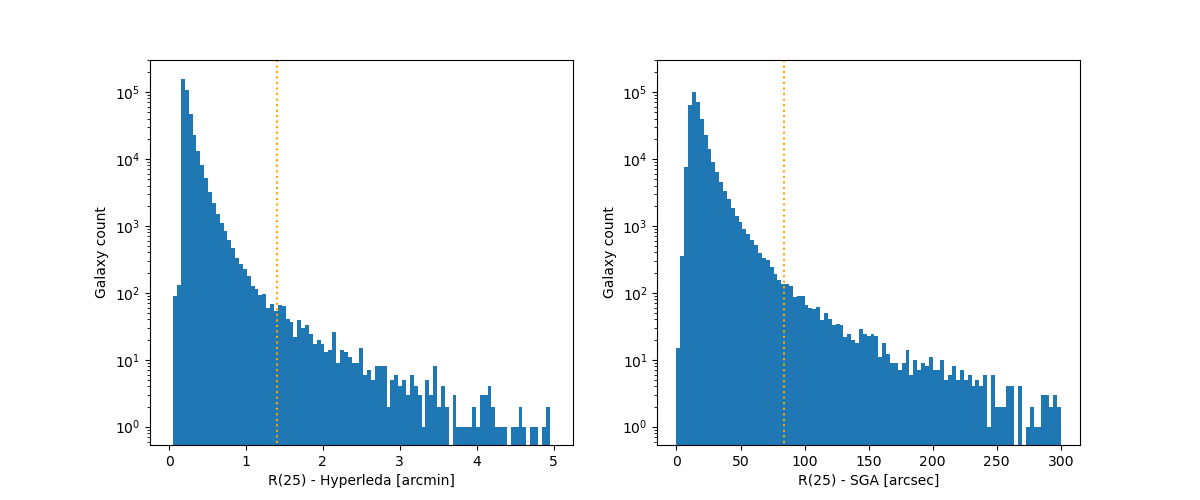

/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  from ipykernel import kernelapp as app
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


In [30]:
D25_bins = 0.5*np.linspace(0,10,100)
R25_bins = np.linspace(0,300,100)

plt.figure(figsize=(12,5))

plt.subplot(121)
#plt.hist(SGA['D25_LEDA'], bins=D25_bins)
plt.hist(0.5*SGA['D25_LEDA'][SGA['IN_FOOTPRINT_GRZ']], bins=D25_bins)
plt.vlines(1.4, 0,300000, colors='orange', linestyles='dotted')

plt.xlabel('R(25) - Hyperleda [arcmin]')
plt.ylabel('Galaxy count')

plt.yscale('log')
plt.ylim(0,300000)


plt.subplot(122)
plt.hist(SGA['RADIUS_SB25'][SGA['IN_FOOTPRINT_GRZ']], bins=R25_bins)
plt.vlines(1.4*60, 0,300000, colors='orange', linestyles='dotted')

plt.xlabel('R(25) - SGA [arcsec]')
plt.ylabel('Galaxy count')

plt.yscale('log')
plt.ylim(0,300000);

#plt.savefig('../figures/SGA_D25.png', transparent=True);

In [32]:
print("Number of SGA galaxies in DESI with R25 > 1.4':", np.sum(SGA['RADIUS_SB25'][SGA['IN_FOOTPRINT_GRZ']] >= 1.4*60))
print('This is', np.sum(SGA['RADIUS_SB25'][SGA['IN_FOOTPRINT_GRZ']] >= 1.4*60)/len(SGA['RADIUS_SB25'][SGA['IN_FOOTPRINT_GRZ']]), 
      'fraction of the SGA in DESI.')

Number of SGA galaxies in DESI with R25 > 1.4': 1535
This is 0.004105298911226588 fraction of the SGA in DESI.


<IPython.core.display.Javascript object>


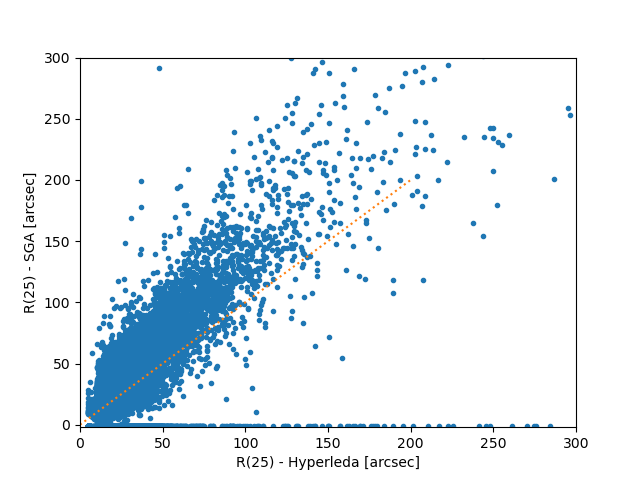

In [34]:
plt.figure()

plt.plot(0.5*60*SGA['D25_LEDA'][SGA['IN_FOOTPRINT_GRZ']], SGA['RADIUS_SB25'][SGA['IN_FOOTPRINT_GRZ']], '.')
plt.plot([0,200], [0,200], ':')

plt.xlim(0,300)
plt.ylim(-2,300)

plt.xlabel('R(25) - Hyperleda [arcsec]')
plt.ylabel('R(25) - SGA [arcsec]');

In [48]:
SGA_LG = SGA[SGA['RADIUS_SB25'] >= 1.4*60]

print('There are only', np.sum(SGA['RADIUS_SB25'][SGA['IN_FOOTPRINT_GRZ']] > 0), 'SGA galaxies with radii.')

There are only 354603 SGA galaxies with radii.


## Morphological types

In [36]:
SGA['MORPHTYPE'][:10]

S?
Sc
S?
Sbc
E
S?
S?
Sbc
""
""


In [37]:
N_ellipticals = 0
N_spirals = 0
N_notNaN = 0

for morph in SGA['MORPHTYPE']:
    if len(morph) > 0:
        if morph[0] == 'S':
            N_spirals += 1
        elif morph[0] == 'E':
            N_ellipticals += 1

        if morph != 'nan':
            N_notNaN += 1

In [38]:
print('Visually-inspected ellipticals:', N_ellipticals, N_ellipticals/N_notNaN)
print('Visually-inspected spirals:', N_spirals, N_spirals/N_notNaN)
print('Visually-inspected objects:', N_notNaN, N_notNaN/len(SGA))

Visually-inspected ellipticals: 64909 0.25846875510195955
Visually-inspected spirals: 179469 0.7146486467114511
Visually-inspected objects: 251129 0.08018241548213569


# Inclination angles

Minimum inclination angle of $25^\circ$

In [39]:
i_min = 25*np.pi/180.

ba_max = np.cos(i_min)

<IPython.core.display.Javascript object>


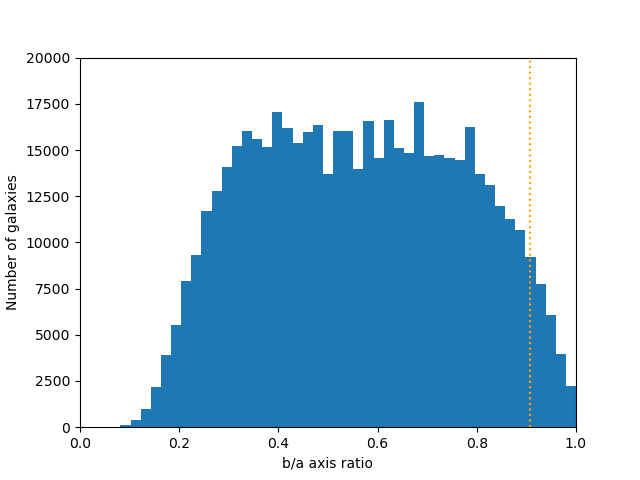

In [41]:
ba_bins = np.linspace(0,1,50)

plt.figure()

plt.hist(SGA['BA'], bins=ba_bins)
plt.vlines(ba_max, 0,25000, colors='orange', linestyles='dotted')

plt.xlabel('b/a axis ratio')
plt.ylabel('Number of galaxies')

plt.xlim(0,1)
plt.ylim(0,20000);

# Target density

What is the sky density of galaxies in the SGA?  Of disk galaxies in the SGA?  Of elliptical galaxies in the SGA?

Note: Spirals are defined as having an exponential profile!

In [49]:
plt.figure(figsize=(10,5))

plt.plot(SGA['SGA_RA'], SGA['SGA_DEC'], '.', markersize=1, label='SGA')
plt.plot(SGA['SGA_RA'][SGA['IN_FOOTPRINT_GRZ']], SGA['SGA_DEC'][SGA['IN_FOOTPRINT_GRZ']], 
         '.', markersize=1, label='SGA in DESI')
#plt.plot(SGA_Christoph['ra'], SGA_Christoph['dec'], 
#         '.', markersize=1, label='Christoph')
plt.plot(SGA_Christoph['ra'][SGA_Christoph['inSGA']], 
         SGA_Christoph['dec'][SGA_Christoph['inSGA']], 
         '.', markersize=1, label='Christoph + SGA')
plt.plot(SGA_LG['SGA_RA'][SGA_LG['IN_FOOTPRINT_GRZ']], SGA_LG['SGA_DEC'][SGA_LG['IN_FOOTPRINT_GRZ']], 
         '.', markersize=1, label='LG in SGA')

plt.xlabel('ra [deg]')
plt.ylabel('dec [deg]')

plt.legend()

plt.tight_layout();

<IPython.core.display.Javascript object>

/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


Using $150^\circ < \alpha < 250^\circ$, $0^\circ < \delta < 50^\circ$, the target densities are:

In [6]:
disks = SGA_Christoph[SGA_Christoph['MORPHTYPE'] == 'EXP']

disks_edge = disks[disks['BA_ratio'] <= ba_max]

disks_SGA = disks_edge[disks_edge['inSGA']]

In [8]:
sky_chunk_boolean = np.logical_and.reduce([disks_SGA['ra'] > 150, disks_SGA['ra'] < 250, 
                                           disks_SGA['dec'] > 0, disks_SGA['dec'] < 50])

num_spirals_in_sky_chunk = np.sum(sky_chunk_boolean)

sky_area = 100*50

print('The number of disk galaxies in this portion of the sky is', num_spirals_in_sky_chunk)
print('The number of disk galaxies per square degree is', num_spirals_in_sky_chunk/sky_area)
print('The number of disk galaxy targets per square degree is', 2*num_spirals_in_sky_chunk/sky_area)

The number of disk galaxies in this portion of the sky is 21550
The number of disk galaxies per square degree is 4.31
The number of disk galaxy targets per square degree is 8.62


In [7]:
len(disks_SGA)

58904

In [8]:
sum(SGA_Christoph['inSGA'])

274394

In [9]:
sum(SGA['IN_DESI'])

397746

In [10]:
sum(SGA['IN_DESI_GRZ'])

377587